# Progress Report 2

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("merged_top500_clean.csv")

df.head() #confirming that it is loaded correctly

C:\Users\Owner\AppData\Local\Temp\ipykernel_27992\964965853.py:6: DtypeWarning: Columns (24,25,29,31,33,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_top500_clean.csv")


,Rank,Site,Manufacturer,Computer,Country,Year,Processors,Nmax,Nhalf,Processor Family,...,Efficiency (%),Power Source,HPCG [TFlop/s],Power Effeciency [GFlops/Watts],Site ID,System ID,Energy Efficiency [GFlops/Watts],RMax (Flop/s),RPeak (Flop/s),Power (W)
0,1,Los Alamos National Laboratory,Thinking Machines Corporation,CM-5/1024,United States,1993,1024.0,52224.0,24064.0,Sparc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.7,131.00,NaN
1,2,Minnesota Supercomputer Center,Thinking Machines Corporation,CM-5/544,United States,1993,544.0,36864.0,16384.0,Sparc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.4,69.63,NaN
2,3,NCSA,Thinking Machines Corporation,CM-5/512,United States,1993,512.0,36864.0,16384.0,Sparc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.4,65.54,NaN
3,4,National Security Agency,Thinking Machines Corporation,CM-5/512,United States,1993,512.0,36864.0,16384.0,Sparc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.4,65.54,NaN
4,5,NEC,NEC,SX-3/44R,Japan,1990,4.0,6400.0,830.0,NEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.2,25.60,NaN


# Complete columns 

In [52]:
# Identify columns with no missing values
complete_columns = [col for col in df.columns if df[col].notnull().all()]
print("Complete columns:", complete_columns)

Complete columns: ['Rank', 'Site', 'Manufacturer', 'Computer', 'Country', 'Year', 'Processors', 'Processor', 'System Family', 'Architecture', 'Segment', 'Continent', 'Publication Date', 'RMax (Flop/s)', 'RPeak (Flop/s)']


In [53]:
top_sites = df['Site'].value_counts().head(10)
print("Top 10 most common sites:")
print(top_sites)

top_manufacturers = df['Manufacturer'].value_counts().head(10)
print("Top 10 most common manufacturers:")
print(top_manufacturers)

Top 10 most common sites:
Site
Government                                1003
Service Provider T                         767
Software Company (M)                       555
Hosting Services                           371
Internet Company                           368
IT Service Provider                        357
Lawrence Livermore National Laboratory     336
Semiconductor Company (C)                  307
Geoscience (P)                             291
Los Alamos National Laboratory             284
Name: count, dtype: int64
Top 10 most common manufacturers:
Manufacturer
IBM                 7252
Hewlett-Packard     5552
Cray Inc.           3062
Lenovo              2691
SGI                 2022
HPE                 1415
Sun Microsystems    1191
Fujitsu              986
Inspur               878
Sugon                799
Name: count, dtype: int64


In [54]:
top_computers = df['Computer'].value_counts().head(10)
print("Top 10 most common computers:")
print(top_computers)

Top 10 most common computers:
Computer
Lenovo C1040, Xeon E5-2673v4 20C 2.3GHz, 40G Ethernet          557
SP Power3 375 MHz                                              456
SP PC604e 332 MHz                                              417
ORIGIN 2000                                                    387
SuperDome 875 MHz/HyperPlex                                    364
POWER CHALLENGE                                                361
Cluster Platform 3000 BL460c, Xeon 54xx 3.0GHz, GigEthernet    270
Lenovo HR650x, Xeon Gold 6133 20C 2.5GHz, 25G Ethernet         242
HPC 10000 400 MHz Cluster                                      233
HPC 10000                                                      222
Name: count, dtype: int64


In [55]:
top_segments = df['Segment'].value_counts().head(10)
print("Top 10 most common segments:")
print(top_segments)

Top 10 most common segments:
Segment
Industry      15150
Research       7752
Academic       6146
Vendor         1004
Government      933
Classified      876
Others          139
Name: count, dtype: int64


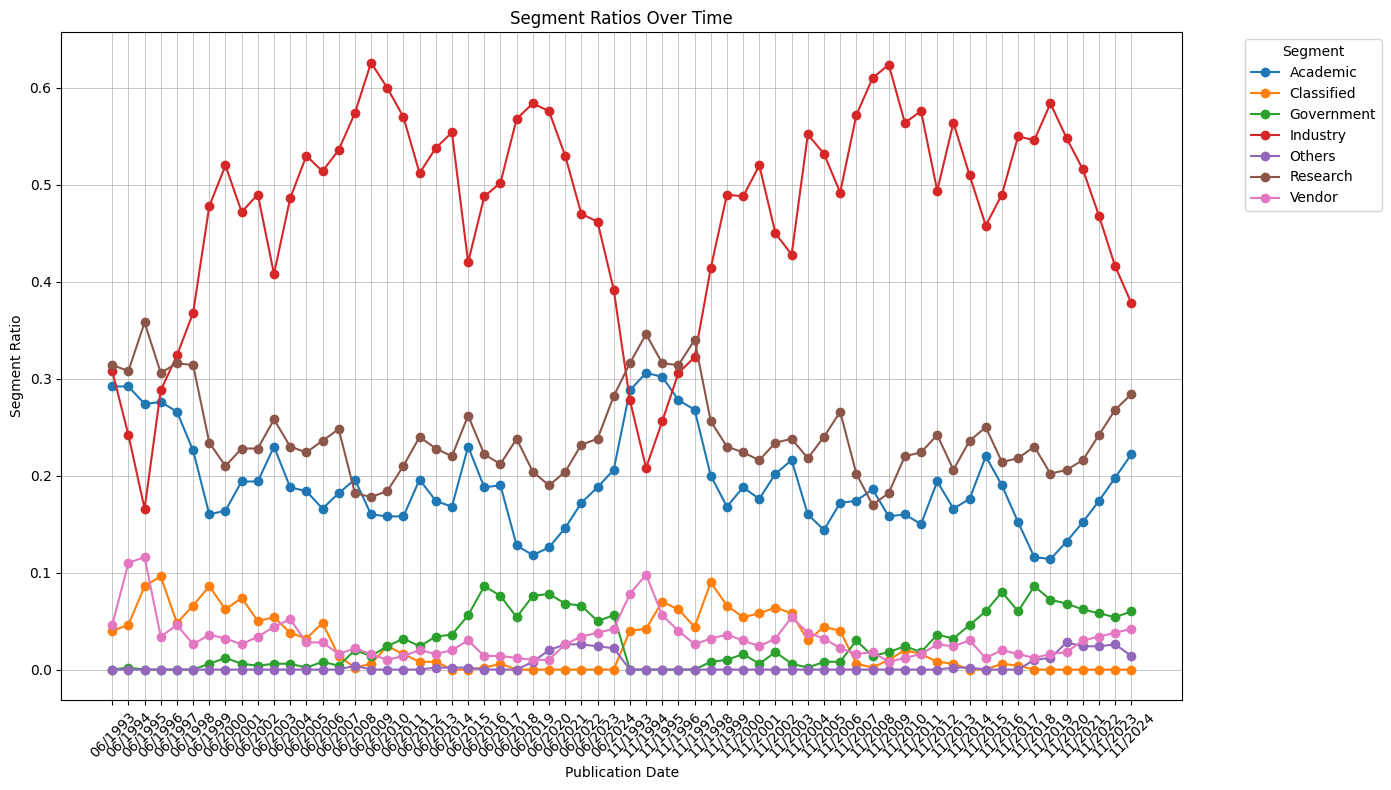

In [56]:
# Group by Publication Date and Segment, and count the occurrences
segment_counts = df.groupby(['Publication Date', 'Segment']).size().unstack(fill_value=0)

# Normalize the counts to get the ratio for each segment
segment_ratios = segment_counts.div(segment_counts.sum(axis=1), axis=0)

# Display the result
# print(segment_ratios)

# Plot the segment ratios over time
plt.figure(figsize=(14, 8))
for segment in segment_ratios.columns:
    plt.plot(segment_ratios.index, segment_ratios[segment], marker='o', label=segment)

plt.xlabel('Publication Date')
plt.ylabel('Segment Ratio')
plt.title('Segment Ratios Over Time')
plt.xticks(rotation=45)
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(visible=True, which='both', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

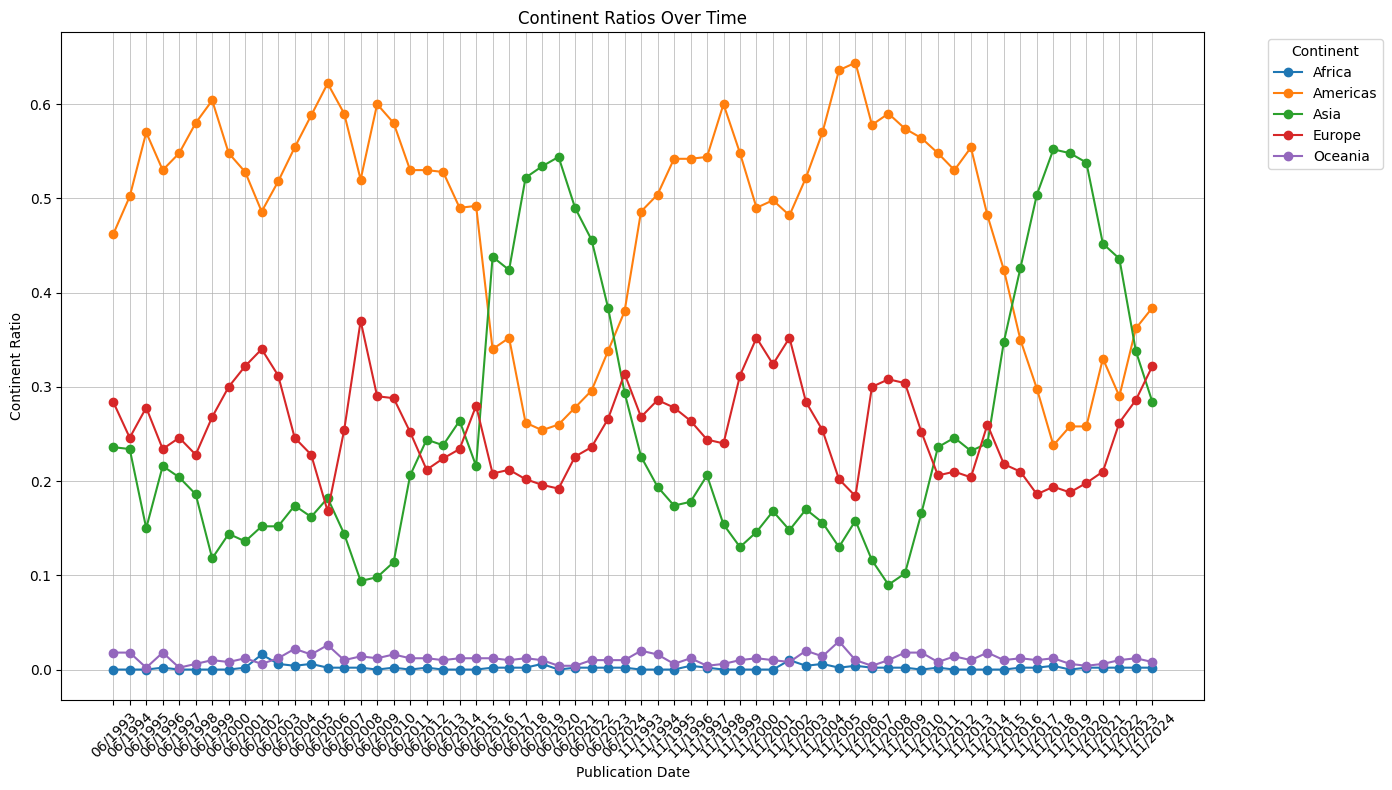

In [57]:
# Group by Publication Date and Continent, and count the occurrences
continent_counts = df.groupby(['Publication Date', 'Continent']).size().unstack(fill_value=0)

# Combine North America and South America into Americas (only a few had problems with this)
continent_counts['Americas'] += continent_counts['North America'] + continent_counts['South America']
continent_counts.drop(['North America', 'South America'], axis=1, inplace=True)

# Normalize the counts to get the ratio for each continent
continent_ratios = continent_counts.div(continent_counts.sum(axis=1), axis=0)

# Plot the continent ratios over time
plt.figure(figsize=(14, 8))
for continent in continent_ratios.columns:
    plt.plot(continent_ratios.index, continent_ratios[continent], marker='o', label=continent)

plt.xlabel('Publication Date')
plt.ylabel('Continent Ratio')
plt.title('Continent Ratios Over Time')
plt.xticks(rotation=45)
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(visible=True, which='both', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

In [58]:
top_system_families = df['System Family'].value_counts().head(10)
print("Top 10 most common system families:")
print(top_system_families)

Top 10 most common system families:
System Family
IBM Cluster                   2409
HP Cluster Platform 3000BL    2119
IBM SP                        1985
Lenovo ThinkSystem            1537
HP Superdome                  1400
Cray Vector                   1056
Lenovo Cluster                 958
HP Cluster Platform 3000       957
SGI Origin                     948
Sun UltraHPC                   908
Name: count, dtype: int64


In [59]:
missing_publication_date_count = df['Publication Date'].isnull().sum()
print(f"Number of rows missing a publication date: {missing_publication_date_count}")

Number of rows missing a publication date: 0


--------------------

# Machine Learning Analysis of TOP500 Historical Data

The TOP500 dataset provides rich historical data on supercomputer performance and specifications. Here's a structured approach for machine learning analysis using the available columns.

1. Key Analysis Directions

**Performance Prediction**
- Predict `RMax`/`RPeak` using technical specs (`Processors`, `Architecture`) and temporal features (`Year`).
- Model exponential growth patterns in computational power (e.g., Moore's Law implications).

**Manufacturer/Country Analysis**
- Cluster systems by `Manufacturer`/`Country` to identify technological dominance patterns.
- Analyze market share changes using `Year` and `Continent` columns.

**Architectural Evolution**
- Track `Architecture`/`Processor` trends over time.
- Correlate architectural shifts with performance jumps.

---

2. Feature Engineering Strategies

| Feature Type        | Engineering Approach                     | Example Targets               |
|---------------------|------------------------------------------|--------------------------------|
| Temporal            | Decade bins, performance growth rates    | Year-over-year Flop/s changes |
| Categorical         | Manufacturer embeddings, country GDP     | Regional tech investment      |
| Performance Metrics | RMax/RPeak ratio, efficiency calculations | System optimization analysis  |

---

3. Recommended Models

Time-aware validation split

train = data[data['Year'] < 2020]

test = data[data['Year'] >= 2020]

Gradient Boosting example

from xgboost import XGBRegressor

model = XGBRegressor(objective='reg:squarederror')

model.fit(train[features], train['RMax'])


---

4. Critical Data Considerations
- **Temporal Autocorrelation**: Performance metrics show strong time dependence.
- **Categorical Sparsity**: Many manufacturers appear infrequently (require embedding or grouping).
- **Exponential Scaling**: Apply log-transform to `RMax/RPeak` for linear modeling.

---

5. Visualization Priorities
- **Performance Trends**: Log-scale plots of RMax vs Year.
- **Geospatial Analysis**: World map of supercomputer density by `Country`.
- **Architecture Radar Charts**: Compare specs across system families.

---

Focus on interpretable models to reveal technological leap patterns rather than pure predictive accuracy. The `System Family` and `Processor` columns may require NLP techniques for proper encoding due to their textual nature.


In [60]:
from sklearn.linear_model import LinearRegression

# 1. Prepare Top-Rank Data
top1_df = df[df['Rank'] == 1].copy()

# 2. Create Time-Based Features
top1_df['Years_Since_1993'] = top1_df['Year'] - 1993  # Using first TOP500 publication year

# 3. Handle Exponential Growth
top1_df['log_Processors'] = np.log10(top1_df['Processors'])

# 4. Train Simple Time-Series Model
X = top1_df[['Years_Since_1993']]
y = top1_df['log_Processors']

model = LinearRegression()
model.fit(X, y)

# 5. Predict for 2030
years_to_predict = pd.DataFrame({
    'Years_Since_1993': [2030 - 1993]
})

log_pred = model.predict(years_to_predict)
pred_cores = 10**log_pred[0]

print(f"Predicted processors for #1 system in 2030: {pred_cores:,.0f}")

# Compare predictions vs actual for existing years
top1_df['Predicted'] = 10**model.predict(X)

# print(top1_df[['Year', 'Processors', 'Predicted']])

# Round the predicted values to whole numbers
top1_df['Predicted'] = top1_df['Predicted'].round()

# Print the updated DataFrame with rounded predictions
# print(top1_df[['Year', 'Processors', 'Predicted']])

# Calculate percent error between predicted and actual processor counts
top1_df['Percent_Error'] = ((top1_df['Predicted'] - top1_df['Processors']).abs() / top1_df['Processors']) * 100

# Print the updated DataFrame with percent error
print(top1_df[['Year', 'Processors', 'Predicted', 'Percent_Error']])

Predicted processors for #1 system in 2030: 445,324,485
       Year  Processors   Predicted  Percent_Error
0      1993      1024.0       713.0      30.371094
500    1993       140.0       713.0     409.285714
1000   1993      3680.0       713.0      80.625000
1500   1993       140.0       713.0     409.285714
2000   1993       140.0       713.0     409.285714
...     ...         ...         ...            ...
29500  2021   8730112.0  17333554.0      98.549045
30000  2021   8699904.0  17333554.0      99.238451
30500  2021   8699904.0  17333554.0      99.238451
31000  2021   8699904.0  17333554.0      99.238451
31500  2024  11039616.0  51146658.0     363.301060

[64 rows x 4 columns]


In [61]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

def prepare_training_data(df):
    """Process historical TOP500 data for model training"""
    # Feature engineering
    train_df = df.copy()
    train_df['log_RMax'] = np.log10(train_df['RMax (Flop/s)'])
    train_df['log_Processors'] = np.log10(train_df['Processors'])
    train_df['Efficiency'] = train_df['RMax (Flop/s)'] / train_df['RPeak (Flop/s)']
    
    # Temporal features
    train_df['Years_Since_1993'] = train_df['Year'] - 1993
    train_df['Decade'] = (train_df['Year'] // 10) * 10
    
    # Target transformation (rank is 1-based)
    train_df['log_Rank'] = np.log1p(train_df['Rank'])
    
    return train_df

def train_ranking_model(train_df):
    """Train time-aware ranking predictor"""
    features = [
        'log_RMax', 'log_Processors', 'Efficiency',
        'Years_Since_1993', 'Decade'
    ]
    
    model = HistGradientBoostingRegressor(
        max_iter=200,
        categorical_features=[False]*len(features),
        random_state=42
    )
    
    scaler = StandardScaler()
    X = scaler.fit_transform(train_df[features])
    y = train_df['log_Rank']
    
    model.fit(X, y)
    return model, scaler, features

def predict_rank(model, scaler, features, theoretical_input):
    """
    Predict ranking for theoretical system
    Input format: {
        'Year': 2030,
        'RMax (Flop/s)': 2e18,  # Required
        'Processors': 25000000,
        'RPeak (Flop/s)': 2.5e18
    }
    """
    # Create input dataframe
    input_df = pd.DataFrame([theoretical_input])
    
    # Feature engineering
    input_df['log_RMax'] = np.log10(input_df['RMax (Flop/s)'])
    input_df['log_Processors'] = np.log10(input_df['Processors'])
    input_df['Efficiency'] = (
        input_df['RMax (Flop/s)'] / input_df['RPeak (Flop/s)']
    )
    input_df['Years_Since_1993'] = input_df['Year'] - 1993
    input_df['Decade'] = (input_df['Year'] // 10) * 10
    
    # Scale and predict
    X = scaler.transform(input_df[features])
    log_rank = model.predict(X)[0]
    predicted_rank = np.expm1(log_rank)
    
    return round(predicted_rank)

# Example usage
if __name__ == "__main__":
    
    # Prepare training data
    train_df = prepare_training_data(df)
    
    # Train model
    model, scaler, features = train_ranking_model(train_df)
    
    # User input for theoretical system
    user_input = {
        'Year': 2060,
        'RMax (Flop/s)': 3e21,  # 3 exaflops
        'Processors': 2500000000,
        'RPeak (Flop/s)': 3.3e21
    }
    
    # Get prediction
    predicted_rank = predict_rank(model, scaler, features, user_input)
    print(f"Predicted 2030 Rank: {predicted_rank} (Top {round(predicted_rank/500*100,1)}%)")


Predicted 2030 Rank: 4 (Top 0.8%)


In [62]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.utils import resample

def prepare_training_data(df):
    """Process historical TOP500 data for model training"""
    train_df = df.copy()
    
    # Feature engineering
    train_df['log_RMax'] = np.log10(train_df['RMax (Flop/s)'])
    train_df['log_Processors'] = np.log10(train_df['Processors'])
    train_df['Years_Since_1993'] = train_df['Year'] - 1993
    
    # Target transformation
    train_df['log_Rank'] = np.log1p(train_df['Rank'])
    
    return train_df

def train_ranking_model(train_df):
    """Train time-aware ranking predictor"""
    features = [
        'log_RMax', 'log_Processors', 
        'Years_Since_1993'
    ]
    
    model = HistGradientBoostingRegressor(
        max_iter=500,
        learning_rate=0.05,
        random_state=42
    )
    
    X = train_df[features]
    y = train_df['log_Rank']
    
    model.fit(X, y)
    return model, features

def predict_rank(model, features, theoretical_input):
    """Predict ranking for theoretical system"""
    input_df = pd.DataFrame([theoretical_input])
    
    # Feature calculations
    input_df['log_RMax'] = np.log10(input_df['RMax (Flop/s)'])
    input_df['log_Processors'] = np.log10(input_df['Processors'])
    input_df['Years_Since_1993'] = input_df['Year'] - 1993
    
    # Ensure feature order matches training
    X_pred = input_df[features]
    
    # Predict and convert from log scale
    log_rank = model.predict(X_pred)[0]
    return round(np.expm1(log_rank))

def bootstrap_rank(model, features, train_df, n_iter=100):
    """Calculate confidence intervals using bootstrap resampling"""
    preds = []
    for _ in range(n_iter):
        # Resample with replacement
        resampled_df = resample(train_df)
        
        # Retrain model on resampled data
        X_res = resampled_df[features]
        y_res = resampled_df['log_Rank']
        temp_model = HistGradientBoostingRegressor(
            max_iter=500,
            learning_rate=0.05,
            random_state=42
        ).fit(X_res, y_res)
        
        # Predict using original input
        pred = temp_model.predict(X_res)[0]
        preds.append(np.expm1(pred))
        
    return np.percentile(preds, [5, 95])

# Example usage
if __name__ == "__main__":
    # Prepare training data
    train_df = prepare_training_data(df)
    
    # Train model
    model, features = train_ranking_model(train_df)
    
    # User input for theoretical system (modify values as needed)
    user_input = {
        'Year': 2050,
        'RMax (Flop/s)': 3e9,    
        'Processors': 250000
    }
    
    # Get prediction
    predicted_rank = predict_rank(model, features, user_input)
    print(f"Predicted 2030 Rank: {predicted_rank}")
    
    # Get confidence interval
    # lower, upper = bootstrap_rank(model, features, train_df)
    # print(f"95% Confidence Interval: {lower:.0f}-{upper:.0f}")


Predicted 2030 Rank: 132


## Additional Testing

In [63]:
# Keep only top 100 ranks per year
df_top100 = df[df.groupby("Year")["Rank"].rank(method="first") <= 10]

# Use filtered data
features = df_top100[['RPeak (Flop/s)', 'Year']]
target = df_top100['Rank']

# Normalize and train (same as before)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 9.49978646637976
R²: 0.8818352715232224


In [65]:
rmax_input = float(input("Enter RPeak (Flop/s): "))
year_input = int(input("Enter Year: "))

# Format and scale the input just like training data
input_features = pd.DataFrame([[rmax_input, year_input]], columns=['RPeak (Flop/s)', 'Year'])
input_scaled = scaler.transform(input_features)

# Predict
predicted_rank = model.predict(input_scaled)[0]
print(f"📈 Predicted Rank: {round(predicted_rank, 2)}")


📈 Predicted Rank: 2.35
